# Week 2

* Modern portfolio theory: returns and volatility of a portfolio.
* Efficient frontier
* Different ways to get the efficient frontier
* Maximum sharpe ratio porfolio (MSR) and global minimum volatility portfolio (GMV)
* Introduction of risk-free asset. Capital Market Line
* Drawbacks of Markowitz approach. Use of GMV portfolio.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
from pandas_datareader import data 
from datetime import datetime
from scipy.optimize import minimize

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import sys
sys.path.append("../")
import edhec_risk_kit as erk

In [5]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

# 1. Modern portfolio theory (MPT)

The **Modern portfolio theory (MPT)** is a mathematical framework **for assembling a portfolio of assets such that the expected return is maximized for a given level of volatility**. It is a formalization of **diversification in investing**, i.e., the idea that owning different kinds of financial assets is less risky than owning only one assets. 

Modern portfolio theory was born with the efficient frontier analysis of Markowitz (1952).

Unfortunately, early applications of the technique, based on naïve estimates of the input parameters, have been found of little use because leading to non-sensible portfolio allocations.

Moreover the relevance of the mean-variance paradigm has been questioned with heightened scrutiny in the context of sharp market downturns. This section of the course explains how to implement efficient frontier analysis in the presence and in the absence of a risk-free asset. It also discusses how to extend Markowitz analysis so as to make it consistent with real-world constraints.


## 1.1. Efficient Frontiers 

In the MPT, the **efficient frontier** is an a curve which occupies the **efficient** part of the **volatility-return plane**. 
Formally, it is the set of portfolios that can be constructed with the given input assets 
that have the maximum expected returns for a fixed level of volatility and, in turn, 
the lowest volatilities for a fixed level of expected return. The efficient frontier was first formulated by **Harry Markowitz** (1952).

We have to construct a portfolio of several assets and **we want to find the optimal percentages of investment to be allocated in these assets** so that, for example, the total (expected) return of such a portfolio is maximixed for a given level of volatility. 

Hence, suppose that **we have $N > 1$ assets**, and we decide to invest all of our capital in them. Let $\mathbf{w}:=(w_1,\dots,w_N)^T$, with $w_i\in (0,1)$ for all $i=1,\dots,N$, 
be the percentages of investment our portfolio, i.e., $w_i$ is the proportion of investiment in asset $i$. 
We will call the quantities $w_i$ as the **weights**. 

Since we invest all of our capital, there holds $\sum_{i=1}^N w_i = 1$ (this is a **long-only** strategy).

Let $R_i$ and $R_p$ be the return of asset $i$ and the total return of the portfolio, respectively. 
Likewise, let $\sigma_i$ and $\sigma_p$ be the volatility of asset $i$ and the volatility of the portfolio, respectively. 


## 1.2. Return of a portfolio
The **total return of the porfolio** is going to be a simple weigthed sum of the (total) returns of single assets, i.e.,
$$
R_p = \sum_{i=1}^N w_i R_i = \mathbf{w}^T \mathbf{R},
$$
where $\mathbf{R} := (R_1,\dots,R_N)^T$. 
Note that if we have a dataset of **past returns**, the total return $R_p$ is computed as above using the returns of the past data. On the other hand, if we are going to compute invest now, we do not have a series of true (past) return, but we instead would have **expected returns**. Hence, in this case we would have the maean value $\mathbb{E}$ in the formula above. 


## 1.3. Volatility of a portfolio
The **volatility of the porfolio** is computed as the (square root of the) variance of the weigthed sum of the returns of single assets. 

Let us make and axample with only two assets. We have $w_1$ and $w_2$ and two assets whose returns are $R_1$ and $R_2$. We have:
$$
\sigma_p^2 =   \text{Var}(w_1 R_1 + w_2 R_2) = 
w_1^2 \text{Var}(R_1) + w_2^2\text{Var}(R_2) + 2w_1 w_2\text{Cov}(R_1,R_2) =
w_1^2 \sigma_1^2 + w_2^2\sigma_2^2 + 2w_1 w_2\text{Cov}(R_1,R_2), 
$$
where 
$$
\text{Cov}(R_1,R_2) := \mathbb{E}[(R_i-\mu_i)(R_j - \mu_j)], 
$$
is the **covariance** between asset $i$ and $j$ and where $\mu_i$ and $\mu_j$ denote 
the mean returns of assets $i$ and $j$, respectively. In particular, if we let 
$$
\rho_{ij} := \frac{\text{Cov}(R_i,R_j)}{\sigma_i \sigma_j} = \frac{\text{Cov}(i,j)}{\sigma_1 \sigma_2}, 
$$
denote the **correlation coefficient** between assets $i$ and asset $j$, then the volatility of a $2$ assets portfolio becomes:
$$
\sigma_p = 
\sqrt{ w_i^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1 w_2 \sigma_1 \sigma_2 \rho_{ij} }. 
$$
Note that we can write in compact form the such volatility using matrix notation. That is:
$$
\sigma_p = 
\sqrt{
(w_i, w_2)\, 
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix}
\begin{pmatrix}
w_1 \\
w_2 
\end{pmatrix}
}
=
\sqrt{
\mathbf{w}^T \Sigma \mathbf{w}
}
\quad\text{and}\quad
\Sigma := 
\begin{pmatrix}
\sigma^2_1 & \sigma_1 \sigma_2 \rho_{12} \\
\sigma_1 \sigma_2 \rho_{21} & \sigma^2_2
\end{pmatrix},
$$
where $\Sigma$ is the symmetric square **covariance matrix**.


Now, in case of $N$ assets, let again $\Sigma$ be the $N\times N$ covariance matrix, $\Sigma = [c_{ij}]$, 
where each element $c_{ij} := \sigma_i \sigma_j \rho_{ij}$ ($i,j=1,\dots,N$) denote the **covariance** between assets $i$ 
and asset $j$, with $\sigma_i$, $\sigma_j$, and $\rho_{ij}$ being the volatility 
and the correlation coefficient of assets $i$ and $j$, respectively. 
If $i=j$, $c_{ii}=\sigma_i^2$ is simply the variance of asset $i$ (**diagonal entries are the variances**).

The volatility of the portfolio is then given by:
$$
\sigma_p = \sqrt{ \mathbf{w}^T \Sigma \mathbf{w} }.
$$


## 1.4. Efficient frontiers of 2-assets portfolios 

### 1.4.1. Example 1

Generating the efficient frontier requires a set of expected returns and a covariance matrix. For now, let's assume that we can estiamte these simply by looking back in time and naively assuming they will hold in the future. Clearly, they will not, but we will have plenty of time to dig into that in future lectures. For the moment, assume that our naive method of estimating these parameters will suffice.

Let's write a function that draws the efficient frontier for a simple 2 asset case.

Start by generating a sequence of weights in a list of tuples. Python makes it easy to generate a list by using something called a _list comprehension_ ... which you can think of as an efficient way to generate a list of values instead of writing a for loop.


In [6]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

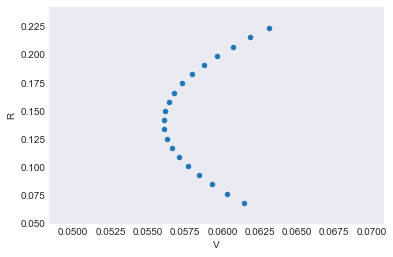

In [7]:
l = ["Games", "Fin"]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.scatter(x="V", y="R")

We have a built-in function for that:

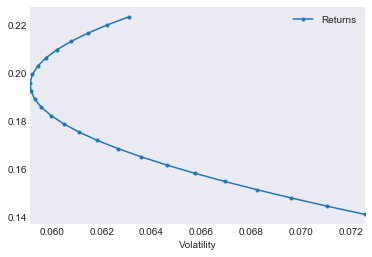

In [8]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l].values, cov.loc[l,l])

Note that to plot the EF, we need the expected returns and the covariance.

### 1.4.2. Example 2
In the following, we propose an artificial example in order to see the curve that is drawn by different portfolios which 
are constructed with only $2$ assets with different correlation $\rho_{12}$. 
First of all, we assume to generate $500$ **daily returns** of $2$ assets:

In [9]:
nret             = 500
periods_per_year = 252
risk_free_rate   = 0.0

Then, we set up a value for the means and the volatility of our two artifical assets:

In [10]:
mean_1 = 0.001019
mean_2 = 0.001249
vol_1  = 0.016317
vol_2  = 0.019129

and we set up $6$ correlations of the two assets, and for every fixed correlation, 
we will generate $20$ portfolios by allocating $20$ pairs of weights:

In [11]:
# Correlation goes from 1 (completely correlated) to -1 (conversely correlated)
rhos  = np.linspace(1,-1,num=6) 
ncorr = len(rhos)

# Pairs of weights to be used to construct the portfolios for any given correlation
nweig = 20
w1 = np.linspace(0,1,num=nweig)
w2 = 1 - np.linspace(0,1,num=nweig)
ww = pd.DataFrame( [w1, w2] ).T  

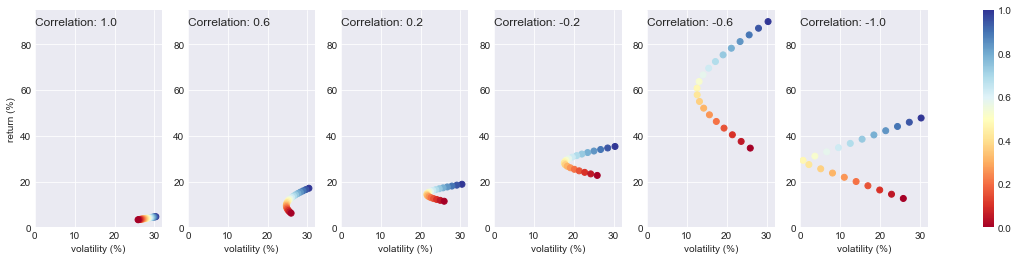

In [12]:
# Set seed
np.random.seed(1)

# Open the figure
fig, ax = plt.subplots(1,6, figsize=(20,4))    
ax = ax.flatten()

for k_rho, rho in enumerate(rhos):
    # Allocate an empty portfolio 
    portfolio = pd.DataFrame(columns=["return","volatility","sharpe ratio"])

    # Generate the assets' returns with the given correlation rho
    cov_ij     = rho * vol_1 * vol_2
    cov_rets   = pd.DataFrame( [[vol_1**2, cov_ij], [cov_ij, vol_2**2]] )
    daily_rets = pd.DataFrame( np.random.multivariate_normal((mean_1,mean_2), cov_rets.values, nret) )
    
    for i in range(ww.shape[0]):
        # Now, construct the portfolio of two asset with correlation rho and weights ww.loc[i]
        weights = ww.loc[i] 
        # here, weights is a column vector (pd.Series)

        # annualized portfolio returns
        ann_rets      = erk.annualize_rets(daily_rets, periods_per_year)
        portfolio_ret = erk.portfolio_return(weights, ann_rets)        

        # annualized portfolio volatility
        portfolio_vol = erk.portfolio_volatility(weights, cov_rets)
        portfolio_vol = erk.annualize_vol(portfolio_vol, periods_per_year)

        # annualized portfolio sharpe ratio
        portfolio_spr = erk.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)

        # dataframe containing the return, volatility, and the sharpe ratio of the portfolio constructed   
        portfolio = portfolio.append( {"return":portfolio_ret, "volatility": portfolio_vol, "sharpe ratio":portfolio_spr}, ignore_index=True)

    # plot create scatter plot coloured by Sharpe Ratio
    im = ax[k_rho].scatter(portfolio["volatility"]*100, portfolio["return"]*100, c=w2, cmap='RdYlBu') 
    ax[k_rho].grid()
    ax[k_rho].set_title("Correlation: {}".format(np.round(rho,2)), y=0.9, loc='left')
    ax[k_rho].set_xlabel("volatility (%)")
    if k_rho==0: ax[k_rho].set_ylabel("return (%)") 
    ax[k_rho].set_xlim([0,32])
    ax[k_rho].set_ylim([0,95])
    
fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()

For any given correlation, each point represents the pair (return, volatility) of a portfolio constructed with some percentage allocation. 
This can be seen in the colorbar: **red corresponds to $\mathbf{w} = (1,0)$**, i.e., allocation of money only to the first asset, whereas 
**blue corresponds to $\mathbf{w} = (0,1)$**, i.e., allocation of money only ot the second asset.  

We can see that **the lower the correlation between the assets, the better the trade-off between return and volatility**: in this example, 
when $\rho=-1$, we could in principle construct a portfolio which guarantee about $30\%$ of return with almost no volatility.

So, the magic about this is that by combining assets, I can get a volatility that can be lower than the individual volatility of each one. This is the benefit of diversification.

### 1.4.3. Example from the real world: US stocks
Now we will get the timeseries of some US economy stocks and see how to construct a portfolio in an efficient way.

In [13]:
tickers  = ['AMZN','KO','MSFT']
n_assets = len(tickers) 

stocks = pd.DataFrame()
for stock_name in tickers:
    # daily data
    stocks[stock_name] = data.DataReader(stock_name, data_source="yahoo", 
                                         start=datetime(2010,1,1), end=datetime(2019,11,15))["Adj Close"]    

In [14]:
stocks.tail()

,AMZN,KO,MSFT
Date,,,
2019-11-11,1771.650024,51.008297,145.217865
2019-11-12,1778.000000,50.880383,146.172012
2019-11-13,1753.109985,51.569153,146.410538
2019-11-14,1754.599976,51.785625,147.155960
2019-11-15,1739.489990,51.824978,149.054306


In [15]:
# compute the daily returns 
daily_rets = erk.compute_returns(stocks)
daily_rets.tail()

,AMZN,KO,MSFT
Date,,,
2019-11-11,-0.007968,-0.007087,0.001028
2019-11-12,0.003584,-0.002508,0.006570
2019-11-13,-0.013999,0.013537,0.001632
2019-11-14,0.000850,0.004198,0.005091
2019-11-15,-0.008612,0.000760,0.012900


In [16]:
# compute the mean daily returns and the covariance of daily returns of the two assets
mean_rets = daily_rets.mean()
std_rets  = daily_rets.std()
cov_rets  = daily_rets.cov()
cov_rets

,AMZN,KO,MSFT
AMZN,0.000384,0.000047,0.000138
KO,0.000047,0.000088,0.000050
MSFT,0.000138,0.000050,0.000207


Now we simulate $4000$ portfolios with weights allocated to the stocks above:

In [17]:
periods_per_year = 252
num_portfolios   = 4000
portfolios       = pd.DataFrame(columns=["return","volatility","sharpe ratio","w1","w2","w3"])
risk_free_rate   = 0

In [18]:
for i in range(num_portfolios):
    # select random weights
    weights = np.random.random(n_assets)
    # and rescale them to sum to 1
    weights /= np.sum(weights)
    
    # annualized portfolio returns
    ann_rets      = erk.annualize_rets(daily_rets, periods_per_year)
    portfolio_ret = erk.portfolio_return(weights, ann_rets)        

    # annualized portfolio volatility
    portfolio_vol = erk.portfolio_volatility(weights, cov_rets)
    portfolio_vol = erk.annualize_vol(portfolio_vol, periods_per_year)

    # annualized portfolio sharpe ratio
    portfolio_spr = erk.sharpe_ratio(portfolio_ret, risk_free_rate, periods_per_year, v=portfolio_vol)
    
    # create dataframe   
    portfolios = portfolios.append( {"return":portfolio_ret, 
                                     "volatility":portfolio_vol, 
                                     "sharpe ratio":portfolio_spr, 
                                     "w1": weights[0], "w2": weights[1], "w3": weights[2]}, 
                                     ignore_index=True)

Now we create a scatter plot coloured by sharpe ratios of the portfolios generated above and we also plot the efficient frontier:

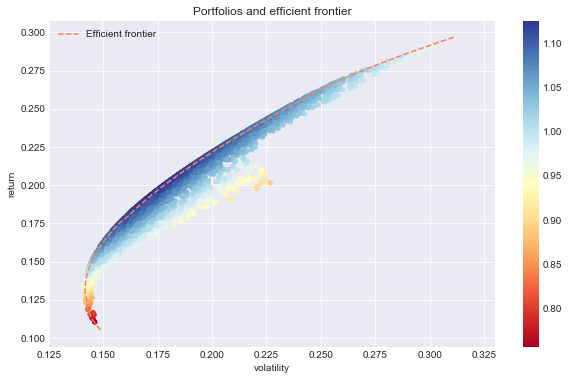

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# Draw the efficient frontier
df = erk.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.set_xlim([0.125,0.33])

fig.colorbar(im, ax=ax)
plt.show()

**We will come back to the plot of the efficient frontier below**.

We can see that if the investor is targeting **a return of $20\%$** he could simply hold 
a portfolio **with volatility of about $17.5\%$**, although there are many other portfolios that 
can guarantee the same return but with much higher volatilities such as $22.5\%$. 
It is clear that one should carefully choose the weights of the portfolio. 

We can see, in particular, that there are **two important** portfolios:

1. the **portfolio with the Global Minimum Volatility (GMV)**, i.e., the global minimum variance portfolio
2. the **portfolio with the Maximum Sharpe Ratio (MSR)**.

From the code above we can easily locate these two portfolios in our dataframe by looking at the lowest volatility and highest sharpe ratio 
and and recover the corresponding weights that have been stored.

In [20]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portfolios.iloc[ portfolios['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portfolios.iloc[ portfolios['sharpe ratio'].idxmax() ]
print("\Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 13.11%
- volatility  : 14.17%
- sharpe ratio: 0.93
\Maximum Sharpe Ratio portfolio:
- return      : 19.39%
- volatility  : 17.24%
- sharpe ratio: 1.13


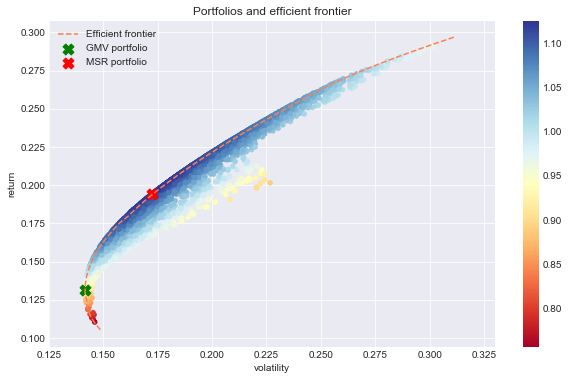

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) 

im = ax.scatter(portfolios["volatility"], portfolios["return"], c=portfolios["sharpe ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("return")
ax.grid()

# Draw the efficient frontier
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")

ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

Let us define the following function which we are going to use several time in what follows:

In [22]:
def get_portfolio_features(weights, rets, covmat, risk_free_rate, periods_per_year):
    # portfolio volatility
    vol = erk.portfolio_volatility(weights, covmat)
    vol = erk.annualize_vol(vol, periods_per_year)

    # portfolio return
    ret = erk.portfolio_return(weights, rets)

    # portfolio sharpe ratio
    shp = erk.sharpe_ratio(ret, risk_free_rate, periods_per_year, v=vol)

    print("Portfolio return:       {:.2f}%" .format(ret*100))
    print("Portfolio volatility:   {:.2f}%" .format(vol*100))
    print("Portfolio sharpe ratio: {:.2f}" .format(shp))
    
    return ret, vol, shp

## 1.5. Finding the optimal portfolios: minimizing the volatility 

In the experiments above, we found the optimal portfolios, i.e., the ones on the efficient frontier, by **simulating a high number of portfolios** and then plotting them. From the plot we could see what the efficient frontier looked like. 
However, we can find an optimal portfolio on the efficient frontier by **solving a minimization problem**, 
for example, by applying the **scipy optimize** method. 


For example, suppose we want to **find the portfolio (on the efficient frontier) which has the minimum volatility**. 
Then the minimization problem is:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

In [23]:
# Let us see the total (annual) returns of single companies we are investing in
ann_rets = erk.annualize_rets(daily_rets, periods_per_year)
ann_rets

AMZN    0.296842
KO      0.105357
MSFT    0.201881
dtype: float64

Now, we can call our minimizer which solves the minimization problem of finding the weights of the portfolio with minimum volatility. 

In [24]:
optimal_weights = erk.minimize_volatility(ann_rets, cov_rets)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 5.57%
  KO:   78.98%
  MSFT: 15.45%


Let us compute the volatility of the portfolio constructed with these weights and locate it on the efficient frontier:

Portfolio return:       13.09%
Portfolio volatility:   14.17%
Portfolio sharpe ratio: 0.92


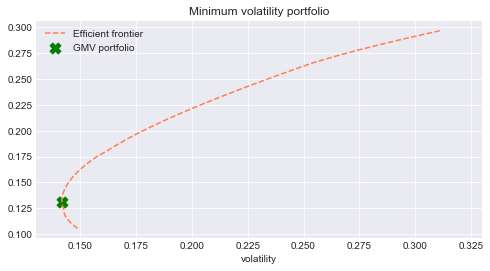

In [25]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='g', s=120, label="GMV portfolio")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Minimum volatility portfolio")
plt.show()

We can also verify that the minimum volatility portfolio obtained by solving the minimization problem almost coincides 
with the one obtained from simulating a high number of portfolios as we have done before: 

In [26]:
print("GMV portfolio:\n")
print("- Monte carlo:")
print("  return:       {:.2f}%" .format(low_vol_portfolio[0]*100))
print("  volatility:   {:.2f}%" .format(low_vol_portfolio[1]*100))
print("  sharpe ratio: {:.2f}" .format(low_vol_portfolio[2]))
print("\n- Minimization problem:")
print("  return:       {:.2f}%" .format(ret*100))
print("  volatility:   {:.2f}%" .format(vol*100))
print("  sharpe ratio: {:.2f}" .format(shp))

GMV portfolio:

- Monte carlo:
  return:       13.11%
  volatility:   14.17%
  sharpe ratio: 0.93

- Minimization problem:
  return:       13.09%
  volatility:   14.17%
  sharpe ratio: 0.92


### 1.5.1. Finding the optimal portfolios: minimizing the volatility given a fixed return

What if we want to find the **portfolio (on the efficient frontier) with minimium volatility for a given a level of return**? 
In this case, we simply have to add a constrain in the minimization problem:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} = R_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
where $R_0$ denotes a fixed level of expected return. For example, suppose we target the following total expected return $R_0=16\%$:

In [27]:
target_return = 0.16

Now, we can call again the minimizer with the option of solving the problem with the constrain for the given target return:

In [28]:
optimal_weights = erk.minimize_volatility(ann_rets, cov_rets, target_return)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 17.72%
  KO:   60.82%
  MSFT: 21.46%


Let us compute the volatility of the portfolio constructed with these weights. 
Also, we double check that the corresponding return is the target return that we have chosen (i.e., $16\%$) and 
locate the portfolio on the efficient frontier:

Portfolio return:       16.00%
Portfolio volatility:   14.87%
Portfolio sharpe ratio: 1.08


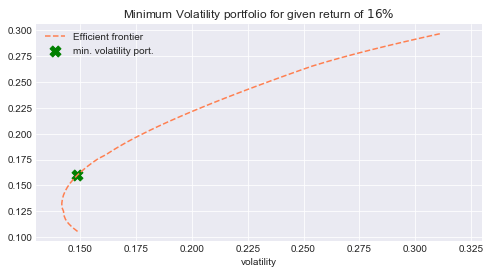

In [29]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, target_return,  marker="X", color='g', s=120, label="min. volatility port.")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Minimum Volatility portfolio for given return of $16\%$")
plt.show()

Recall that **the return of a portfolio will be some value between the minimum and the maximum return from the assets composing the portfolio**. That is, given the same three companies, we cannot achieve a return of, say $40\%$ since the maximum return achievable is about $30\%$ from Amazon. 
In fact, if we run the minimizer with a target return equal to $40\%$ we will get zero weights to all assets but Amazon:

In [30]:
optimal_weights = erk.minimize_volatility(ann_rets, cov_rets, 0.4)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 100.00%
  KO:   0.00%
  MSFT: 0.00%


## 1.6. Finding the optimal portfolios: maximizing the sharpe ratio 

Now, consider the case of finding **the portfolio (on the efficient frontier) with the highest sharpe ratio**. 

Note that scipy offers a **minimize** method, but no a **maximize** a method, and we may then conclude 
that we are not able to find such a portfolio by solving an optimization problem. 
However, **the maximization of the sharpe ratio is nothing but the minimization of the negative sharpe ratio**. 
That is, we have 
$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$

Let us use our minimizer:

In [39]:
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 31.92%
  KO:   39.61%
  MSFT: 28.47%


Portfolio return:       19.40%
Portfolio volatility:   17.24%
Portfolio sharpe ratio: 1.13


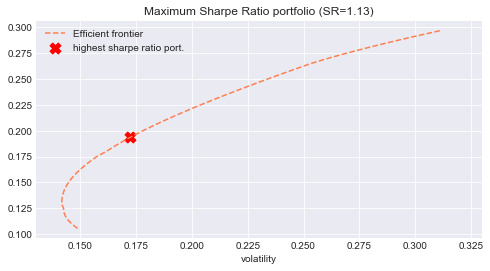

In [40]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highest sharpe ratio port.")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio (SR={:.2f})".format(shp))
plt.show()

and let us see how these numbers differ from those obtained from the Monte Carlo simulation:

In [41]:
print("MSR portfolio:\n")
print("- Monte carlo:")
print("  return:       {:.2f}%" .format(high_sharpe_portfolio[0]*100))
print("  volatility:   {:.2f}%" .format(high_sharpe_portfolio[1]*100))
print("  sharpe ratio: {:.2f}" .format(high_sharpe_portfolio[2]))
print("\n- Minimization problem:")
print("  return:       {:.2f}%" .format(ret*100))
print("  volatility:   {:.2f}%" .format(vol*100))
print("  sharpe ratio: {:.2f}" .format(shp))

MSR portfolio:

- Monte carlo:
  return:       19.39%
  volatility:   17.24%
  sharpe ratio: 1.13

- Minimization problem:
  return:       19.40%
  volatility:   17.24%
  sharpe ratio: 1.13


### 1.6.1. Finding the optimal portfolios: maximize the sharpe ratio given a fixed volatility 

Similarly to what we have done before, we can find the **portfolio (on the efficient frontier) with highest sharpe ratio 
for a given a level of volatility**. In this case, we simply add a constrain in the minimization problem:
$$
\text{minimize} \;\; -  \frac{R_p - r_f}{\sigma_p} =: \text{SR} 
$$
subject to 
$$
\begin{cases}
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} = \sigma_0, \\
\mathbf{w}^T \mathbf{1} = 1, \\
0 \leq \mathbf{w} \leq 1.
\end{cases}
$$
where $\sigma_0$ denotes a fixed level of volatility. For example, suppose we target the following total volatility of $\sigma_0=20\%$:

In [42]:
target_volatility = 0.2
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year, target_volatility)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 43.53%
  KO:   22.47%
  MSFT: 34.00%


Portfolio return:       22.15%
Portfolio volatility:   20.00%
Portfolio sharpe ratio: 1.11


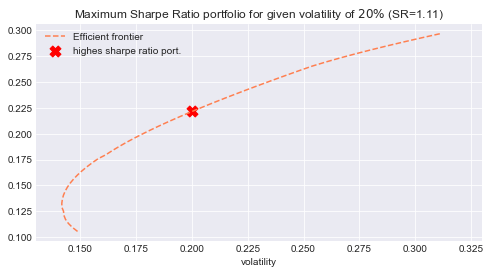

In [43]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

# Draw the efficient frontier
fig, ax = plt.subplots(1,1, figsize=(8,4)) 
df = erk.efficient_frontier(50, daily_rets, cov_rets, periods_per_year)
df.plot.line(x="volatility", y="return", style="--", color="coral", ax=ax, grid=True, label="Efficient frontier")
ax.scatter(vol, ret,  marker="X", color='r', s=120, label="highes sharpe ratio port.")
ax.set_xlim([0.13,0.33])
ax.legend()
ax.set_title("Maximum Sharpe Ratio portfolio for given volatility of $20\%$ (SR={:.2f})".format(shp))
plt.show()

## 1.7. Observation on constraints

It is worth mentioning that so far we have decided to invest all of our capital and, at the same time, our strategy has been **long-only**. That is, the weights that we allocate to the assets sum to $1$ 
and all of them are positive (because we **buy** the assets). 
In particular, these two conditions were imposed when solving the minimization problems. 

However, **we could in principle not invest all of our capital**, which means that we at do not necessarily 
get weights that sum to $1$, and also we may decide to not buy all the assets. We could **short selling** some of them (by short shelling we mean selling an asset that we do not have and that we borrow from someone else).

#### Short selling and not normalized weigths: minimum volatility portofolio given a fixed return 

We can solve the minimization problem without imposing the constraint on positive weigths and the constraint that the weights sum to $1$, i.e., simply:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} = R_0, 
\end{cases}
$$
in the case of finding the minimum volatility portfolio for a fixed return. 
In this case we are allowed to **short sell** the asset and in principle we do not have to invest all of our capital.

For such a problem we can find the analytical solution to the problem by using the **Lagrange multipliers**. 
We define the **Lagrangian** of the problem:
$$
\mathcal{L}(\mathbf{w}, \lambda) := \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} - \lambda(  \mathbf{w}^T \mathbf{R} - R_0 ),
$$
and put the partial derivatives to zero:
$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda  \mathbf{R} = 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} + R_0 = 0.
\end{cases}
$$
From the first equation, we get:
$$
\Sigma \mathbf{w} - \lambda  \mathbf{R} = 0 
\quad\Longrightarrow\quad 
\mathbf{w} = \lambda \Sigma^{-1}\mathbf{R},  
$$
and inserting in the second equation:
$$
- ( \lambda \Sigma^{-1}\mathbf{R} )^T \mathbf{R} + R_0 = 0 
\quad\Longrightarrow\quad 
\lambda \mathbf{R}^T \Sigma^{-1} \mathbf{R} = R_0
\quad\Longrightarrow\quad 
\lambda = \frac{R_0}{\mathbf{R}^T \Sigma^{-1} \mathbf{R}}.
$$
Note that since $\Sigma$ was symmetric, so is $\Sigma^{-1}$, from which $(\Sigma^{-1})^T = \Sigma^{-1}$. 
We can then insert $\lambda$ back into the first equation and obtain:
$$
\mathbf{w}^* = R_0 \frac{\Sigma^{-1}\mathbf{R}}{\mathbf{R}^T \Sigma^{-1} \mathbf{R}},
$$
which is therefore the analytical expression for the weights. Notice that since we have not imposed the constraint 
on the normalisation, we are not guaranteed that such vector of weights sum to $1$. 

#### Short selling and normalized weigths: minimum volatility portofolio given a fixed return 

Analogously, we can also also fin the analytical expression of optimal weights in case we add the condition that the weigths sum to $1$, but without requiring that they have to be all positive, i.e.:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} &= R_0,  \\
\mathbf{w}^T \mathbf{1} &= 1.
\end{cases}
$$
This is again the case in which we can **short sell** the asset but this time we invest all of the capital. 

We define the Lagrangian:
$$
\mathcal{L}(\mathbf{w}, \lambda) := \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} 
- \lambda( \mathbf{w}^T \mathbf{R} - R_0) - \delta(\mathbf{w}^T\mathbf{1}-1),
$$
and put the partial derivatives to zero:
$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda \mathbf{R} - \delta \mathbf{1}= 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} + R_0 = 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{1} + R_0 = 0.
\end{cases}
$$
From the first equation we get:
$$
\mathbf{w} = \Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}), 
$$
and we can insert it in the second and the third equation, respectively:
\begin{cases}
\left(\Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}) \right)^T\mathbf{R} 
&= \lambda \mathbf{R}^T\Sigma^{-1}\mathbf{R} + \delta\mathbf{1}\Sigma^{-1}\mathbf{R} = R_0, \\
\left(\Sigma^{-1}(\lambda \mathbf{R} + \delta\mathbf{1}) \right)^T\mathbf{1} 
&= \lambda \mathbf{R}^T\Sigma^{-1}\mathbf{1} + \delta\mathbf{1}\Sigma^{-1}\mathbf{1} = 1.
\end{cases}
Let us define the following fixed numbers:
$$
\begin{cases}
A & := \mathbf{R}^T \Sigma^{-1} \mathbf{R},  \\
B & := \mathbf{1}^T \Sigma^{-1} \mathbf{R} \equiv \mathbf{R}^T \Sigma^{-1} \mathbf{1}, \\
C & := \mathbf{1}^T \Sigma^{-1} \mathbf{1},
\end{cases}
$$
where notice that in B the second equation is true since $\Sigma^{-1}$ is a symmetric matrix. Hence we have the following system to solve:
$$
\begin{cases}
\lambda A + \delta B &= R_0, \\
\lambda B + \delta C &= 1.
\end{cases}
$$
From the second equation we find $\lambda$ and put it into the first equation:
$$
\lambda = \frac{1-\delta C}{B}
\quad\Longrightarrow\quad 
\frac{1-\delta C}{B} A + \delta B = R_0
\quad\text{from which we find}\quad
\delta = \frac{R_0B - A}{B^2-AC}.
$$
Now, we put $\delta$ back into $\lambda$:
$$
\lambda = \frac{1 - \frac{R_0 B-A}{B^2-AC}C }{B} = \frac{B - R_0 C}{B^2-AC}.
$$
Finally, we can put both $\lambda$ and $\delta$ we have just find back into $\mathbf{w}$ and find the optimal weight:
$$
\mathbf{w}^*  
= \lambda \Sigma^{-1} \mathbf{R} + \delta \Sigma^{-1} \mathbf{1} 
= \frac{B - R_0 C}{B^2-AC} \Sigma^{-1} \mathbf{R}  +  \frac{R_0B - A}{B^2-AC}  \Sigma^{-1}\mathbf{1} 
= \underbrace{ \frac{1}{B^2-AC}\left(B\Sigma^{-1}\mathbf{R} - A\Sigma^{-1}\mathbf{1} \right) }_{:= \mathbf{f} }
+ R_0 \Bigl( \underbrace{ \frac{1}{B^2-AC}\left(B\Sigma^{-1}\mathbf{1} - C\Sigma^{-1}\mathbf{R} \right) }_{:= \mathbf{g} }  \Bigr)
= \mathbf{f} + R_0 \mathbf{g}.
$$

## 1.8. Maximizing the sharpe ratio portfolio in presence of non null risk-free rate

Recall that a **risk-free asset** is an (hypothetical) asset with a risk-free rate. For example, **short-term government securities (such as US treasury bills)** are used as a risk-free asset since **they pay a fixed interest rate and have exceptionally low default risk**. 

The risk-free asset has zero volatility. Furthermore, it is also uncorrelated with any other asset since, 
by definition, its volatility is zero. Therefore, when combined with any other asset in a portfolio, 
**the change in return is linearly related to the change in risk** as the proportions in the combination vary.

### 1.8.1. The capital market line (CML)

When a risk-free asset is introduced, there will be a line satisfying:

 1. it is tangent to the curve at the risky portfolio with the highest Sharpe ratio; 
 2. its vertical intercept represents a portfolio with $100\%$ of holdings in the risk-free asset; 
 3. the tangency with the curve represents the highest sharpe ratio portfolio with no risk-free holdings and $100%$ of risky assets; 
 assets held in the portfolio occurring at the tangency point; 
 4. points on this line represent portfolios containing positive amounts of both the risky assets and the risk-free asset; 
 
This efficient line is called the **Capital Market Line (CML)**, and its given by:
$$
R_{CML} = R_{f} + \sigma_{CML}\frac{R_{p} - R_{f}}{\sigma_{p}}, 
$$
where $R_p$ and $\sigma_p$ are the return and the volatility of the risky portfolio with no risk free asset, respectively, 
$R_f$ denotes the risk-free rate, and $R_{CML}$ and $\sigma_{CML}$ denote the return and the volatility of the 
portfolio combining both risky assets and the risk-free asset, respectively.

In [44]:
risk_free_rate = 0.06
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
print("optimal weights:")
print("  AMZN: {:.2f}%".format(optimal_weights[0]*100))
print("  KO:   {:.2f}%".format(optimal_weights[1]*100))
print("  MSFT: {:.2f}%".format(optimal_weights[2]*100))

optimal weights:
  AMZN: 54.48%
  KO:   6.43%
  MSFT: 39.09%


In [45]:
ret, vol, shp = get_portfolio_features(optimal_weights, ann_rets, cov_rets, risk_free_rate, periods_per_year)

Portfolio return:       24.74%
Portfolio volatility:   23.03%
Portfolio sharpe ratio: 0.81


Let us plot the efficient frontier and the capital market line using the optional argument in our plot method:

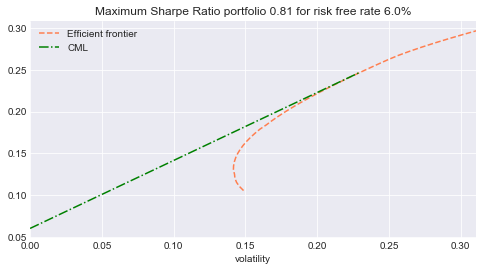

In [46]:
df, ax = erk.efficient_frontier(40, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, cml=True)
ax.set_title("Maximum Sharpe Ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

The introduction of the risk-free asset as a possible component of the portfolio has improved the range of volatility-return combinations available since **everywhere, except at the tangency portfolio, the CML provides a higher return than the (old) efficient frontier does 
at every possible volatility.** 

Note that the efficient frontier method has other optional parameter to plot the highest sharpe ratio, the minimum volatility, and the equally weigthed portfolio as well:

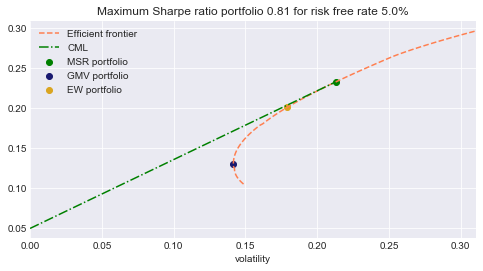

In [47]:
risk_free_rate = 0.05
df, ax = erk.efficient_frontier(90, daily_rets, cov_rets, periods_per_year, risk_free_rate=risk_free_rate, 
                                iplot=True, hsr=True, cml=True, mvp=True, ewp=True)
ax.set_title("Maximum Sharpe ratio portfolio {} for risk free rate {}%".format(np.round(shp,2),risk_free_rate*100))
plt.show()

In [48]:
df.tail()

,0,1,2,3,4,5
88,0.306585,0.294691,0.798117,0.977343,1.110223e-16,0.022657
89,0.311073,0.296842,0.793521,1.000000,8.588914e-18,0.000000
90,0.212923,0.232931,0.859140,0.483833,1.543181e-01,0.361849
91,0.141678,0.130930,0.571223,0.055688,7.898496e-01,0.154462
92,0.179320,0.201360,0.844078,0.333333,3.333333e-01,0.333333


## 1.9. Maximizing the sharpe ratio = Minimizing volatility when we invest also in a risk free asset

Suppose that along with the set of risky assets there is also a risk-free asset with volatility zero and return equal to the risk-free rate $R_f$. In this case, we may want to minimize the volatility of the portfolio (i.e., the volatility of the part of the portfolio invested in the risky assets, since the the risk-free asset, by definition, is risk free) in which we have allocated some weights $\mathbf{w}$ in the risky assets and the remaining part of our capital, i.e., $1-\mathbf{w}^T\mathbf{1}$, in the risk-free asset:
$$
\text{minimize} \;\; \frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w}, 
$$
subject to 
$$
\begin{cases}
\mathbf{w}^T \mathbf{R} + (1 - \mathbf{w}^T\mathbf{1})R_f &= R_0,  \\
\end{cases}
$$
Note that in this case we can **short sell** the assets and we invest all of the capital. 
We define the Lagrangian:
$$
\mathcal{L}(\mathbf{w}, \lambda) := 
\frac{1}{2} \mathbf{w}^T\Sigma\mathbf{w} 
- \lambda\left( \mathbf{w}^T \mathbf{R} + (1-\mathbf{w}^T\mathbf{1})R_f - R_0\right),
$$
and put the partial derivatives to zero:
$$
\begin{cases}
\frac{\partial\mathcal{L}}{\partial \mathbf{w}} &= \frac{1}{2} (2\Sigma \mathbf{w}) - \lambda \mathbf{R} + \lambda R_f \mathbf{1}= 0, \\
\frac{\partial\mathcal{L}}{\partial \lambda} &=  - \mathbf{w}^T \mathbf{R} - (1-\mathbf{w}\mathbf{1})R_f + R_0 = 0, \\
\end{cases}
$$
From the first equation we get:
$$
\mathbf{w} = \lambda \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}), 
$$
and we can insert it in the second equation:
$$
\left( \lambda\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^T \mathbf{R} + \left( 1 - (\lambda\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}))^T\mathbf{1}   \right) R_f = R_0
\quad \Longrightarrow\quad 
\lambda = \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})}.
$$
We can now put $\lambda$ back into the expression for the weigths:
$$
\mathbf{w}^* 
= \underbrace{ \frac{R_0-R_f}{(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }_{:= r} \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1})
= r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}).
$$
We found the otpimal weight allocations to the risky assets. The allocation to the risk-free rate would be then given by 
$1-\mathbf{w^*}^T\mathbf{1}$. 

#### Portfolio return and volatility
Notice that a portfolio with these weigths should give, by definition, a return equal to the target return $R_0$. 
In fact:
$$
\mu_p = \mathbf{w^*}^T \mathbf{R} + (1 - \mathbf{w^*}^T\mathbf{1})R_f 
= r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} + R_f - r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1} R_f \mathbf{1} 
= \underbrace{ r(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }_{= R_0 - R_f}   + R_f  = R_0.
$$
Right. The volatility of the portfolio is given by:
$$
\sigma_p^2 = \mathbf{w^*}^T\Sigma\mathbf{w^*} 
= \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right)^T \Sigma \left( r \Sigma^{-1}(\mathbf{R} - R_f\mathbf{1}) \right) 
= r^2 (\mathbf{R} - R_f\mathbf{1})^T \Sigma^{-1}\underbrace{\Sigma\Sigma^{-1}}_{=Id} (\mathbf{R} - R_f\mathbf{1}) 
= \frac{(R_0-R_f)^2}{ \left( (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 } 
(\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})
$$
that is:
$$
\sigma_p = \frac{(R_0-R_f)}{ \sqrt{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})} }.
$$

#### Portoflio weigths when full allocation is done to the risky assets (MSR)

If, even in case of risk-free asset, we decide to allocate all the capital to the risky assets we can easily find the weights by normalizing the efficient weights we have found before. In particular, notice that $\mathbf{w}^*$ is proportional to the vector 
$\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$ with the constant of proportionality equal to $r$. 
Hence we can define the weigths:
$$
\mathbf{w}_M := \frac{\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) },
$$
where notice that the denominator is simply the sum of the weigths in $\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})$, i.e., weights in $w_M$ sum to $1$, and correspond to a full allocation of money in the risky assets and zero to the risk-free rate asset. 

Note that the return of such portfolio is given by:
$$
\mu_M = \mathbf{w}_M^T\mathbf{R} = \frac{ (\mathbf{R}-R_f\mathbf{1})^T\Sigma^{-1}\mathbf{R} }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})}, 
$$
while the volatility is:
$$
\sigma_M^2 = \mathbf{w}_M^T \Sigma \mathbf{w}_M 
= \frac{1}{ \left( \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})  \right)^2 } 
(\mathbf{R}-R_f\mathbf{1})^T\underbrace{\Sigma^{-1}\Sigma}_{=Id}\Sigma^{-1} (\mathbf{R}-R_f\mathbf{1}) 
= \frac{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}{ \left( \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1}) \right)^2 }
\quad \Longrightarrow\quad 
\sigma_M = 
\frac{ \sqrt{(\mathbf{R}-R_f\mathbf{1})^T \Sigma^{-1} (\mathbf{R}-R_f\mathbf{1})}  }{ \mathbf{1}^T\Sigma^{-1}(\mathbf{R}-R_f\mathbf{1})  }.
$$

The portoflio of only risky assets with weights given by $\mathbf{w}_M$ is, by constuction, a portfolio with a minimum volatility lying on the efficient frontier. However, we can see that **it is also the portfolio with the highest Sharpe Ratio**. 

Consider the point on the $(\sigma, \mu)$ plane corresponding to the portfolio where we only allocate money to the risk-free asset, 
i.e. the portfolio with $(\sigma,\mu)=(0,R_f)$, and the portfolio where we only allocate money to the risky asset,
i.e. the portfolio with $(\sigma,\mu)=(\sigma_M,\mu_M)$, where $\sigma_M$ and $\mu_M$ have been found above. 
The line connecting these two portfolio is:
$$
\mu - \mu_M = \frac{\mu_M - R_f}{\sigma_M - 0} (\sigma - \sigma_M) 
\quad\text{and then}\quad
\mu = R_f + \frac{\mu_M - R_f}{\sigma_M} \sigma,
$$
i.e., **this is the Capital Market Line**, and we see that **the slope of the CML is the Sharpe Ratio of the portfolio with return $\mu_M$ and $\sigma_M$**, that is, the minimum volatility portfolio on the efficient frontier with weights given by $\mathbf{w}_M$. Furthermore, from the line we see that such portfolio is also the 
maximum Sharpe Ratio portfolio since:
$$
\max \frac{\mu - R_f}{\sigma} = \frac{\mu_M - R_f}{\sigma_M}.
$$

Since the CML connects the portfolios composed of only the risk-free asset and only the risky assets, every point on the line corresponds to an investmentes in both the risk-free rate and the risky assets. In this case, the weights are given by the $\mathbf{w}^*$ previously found. 

First of all, recall that with our method we can find the weigths of the portfolio with the maximum sharpe ratio:

In [49]:
risk_free_rate = 0.06
optimal_weights = erk.maximize_shape_ratio(ann_rets, cov_rets, risk_free_rate, periods_per_year)
optimal_weights

array([0.54475795, 0.06430902, 0.39093302])

Ok. Let us verify our formulas for $\mathbf{w}_M$:

In [50]:
invcov = erk.inverse_df(cov_rets)
ones   = np.repeat(1,3) 
r_rf   = ann_rets - risk_free_rate*ones

In [51]:
w_M = np.dot( invcov, r_rf ) / np.dot( ones, np.dot(invcov, r_rf) )
w_M

array([0.54341316, 0.06476746, 0.39181938])

Yes, they coincide. We implemented these weights in the following method:

In [52]:
erk.weigths_max_sharpe_ratio(cov_rets, r_rf).values

array([0.54341316, 0.06476746, 0.39181938])

Now, let us verify that the portfolio with these weigths has a return and a volatility as in formulas $\mu_M$ and $\sigma_M$:

In [53]:
# return: using the portfolio return method
mu_M = erk.portfolio_return(w_M, ann_rets)
mu_M

0.24723259196553926

In [54]:
# return: using the formula we found
mu_M = np.dot( r_rf, np.dot(invcov, ann_rets) ) / np.dot(ones, np.dot(invcov,r_rf) )
mu_M 

0.24723259196553923

In [55]:
# volatility: using the portfolio vol method
sigma_M = erk.annualize_vol( erk.portfolio_volatility(w_M, cov_rets), periods_per_year)
sigma_M

0.23005214107788932

In [56]:
# volatility: using the formula
sigma_M = np.sqrt( np.dot(r_rf, np.dot(invcov,r_rf)) ) / np.dot(ones, np.dot(invcov,r_rf))
sigma_M = erk.annualize_vol(sigma_M , periods_per_year)
sigma_M

0.23005214107788932

Perfect. Let us now define the $\mathbf{w}^*$ weigths of a portfolio which invest in both the risk-free asset and risky assets:

In [57]:
target_ret = 0.13
wstar = (target_ret - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf)             
wstar

array([0.20316399, 0.02421438, 0.14648815])

To these weigths we have to add the weigth in the risk-free asset:

In [58]:
np.append( wstar, 1-wstar.sum() )

array([0.20316399, 0.02421438, 0.14648815, 0.62613347])

The last weight is the one in the risk-free asset. 
The return of such a portfolio is, by definition, equal to the target return:

In [59]:
mu_p = erk.portfolio_return( np.append(wstar,1-wstar.sum()) , ann_rets.append(pd.Series(risk_free_rate)) )
mu_p

0.13

Let us see the volatility of such a portfolio:

In [60]:
# using the portfolio_volatility method
erk.annualize_vol( erk.portfolio_volatility(wstar, cov_rets), periods_per_year)

0.08600879636605244

In [61]:
# using the formula
sigma_p = erk.annualize_vol( (target_ret - risk_free_rate) / np.sqrt(np.dot(r_rf, np.dot(invcov,r_rf))), periods_per_year )
sigma_p

0.08600879636605244

Finally, let us verify that all portfolio that are constructed using the weigths $\mathbf{w}^*$ and $1-\mathbf{w}^T\mathbf{1}$ lie on the Capital Market Line. We define a set of target returns, from the original target return of $0.06$ up to the maximum sharpe ratio return $\mu_M$:

In [62]:
target_ret_vec = np.linspace(target_ret,mu_M,20)
wstar = [ (tr - risk_free_rate) / np.dot(r_rf, np.dot(invcov,r_rf)) * np.dot(invcov,r_rf) for tr in target_ret_vec ]         
wstar = [ np.append(wstar[i], 1-wstar[i].sum()) for i in range(len(wstar)) ]
wstar 

[array([0.20316399, 0.02421438, 0.14648815, 0.62613347]),
 array([0.22107185, 0.02634876, 0.15940032, 0.59317907]),
 array([0.2389797 , 0.02848313, 0.17231249, 0.56022468]),
 array([0.25688755, 0.0306175 , 0.18522466, 0.52727029]),
 array([0.2747954 , 0.03275187, 0.19813683, 0.4943159 ]),
 array([0.29270325, 0.03488625, 0.211049  , 0.4613615 ]),
 array([0.3106111 , 0.03702062, 0.22396117, 0.42840711]),
 array([0.32851895, 0.03915499, 0.23687334, 0.39545272]),
 array([0.3464268 , 0.04128936, 0.24978551, 0.36249832]),
 array([0.36433465, 0.04342373, 0.26269768, 0.32954393]),
 array([0.3822425 , 0.04555811, 0.27560985, 0.29658954]),
 array([0.40015035, 0.04769248, 0.28852202, 0.26363514]),
 array([0.4180582 , 0.04982685, 0.30143419, 0.23068075]),
 array([0.43596606, 0.05196122, 0.31434636, 0.19772636]),
 array([0.45387391, 0.05409559, 0.32725853, 0.16477197]),
 array([0.47178176, 0.05622997, 0.3401707 , 0.13181757]),
 array([0.48968961, 0.05836434, 0.35308287, 0.09886318]),
 array([0.5075

In [63]:
mus = [erk.portfolio_return(wstar[i], ann_rets.append(pd.Series(risk_free_rate))) for i in range(len(wstar)) ]
sigmas = [erk.annualize_vol((tr - risk_free_rate) / np.sqrt(np.dot(r_rf, np.dot(invcov,r_rf))), periods_per_year) for tr in target_ret_vec]

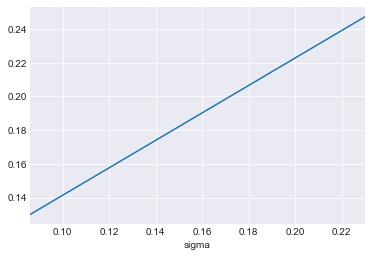

In [64]:
CML = pd.concat([pd.DataFrame(sigmas),pd.DataFrame(mus)], axis=1) 
CML.columns = ["sigma","mu"]
CML.plot.line(x="sigma", y="mu", grid=True, legend=False)
plt.show()

## 1.10. Lack of robustness of the Markowitz procedure and the GMV portfolio

Although the promise of the Markowitz procedure is exciting, in tends to fall apart in practice. The problem is that we rarely know Expected Returns and Expected Covariance in advance. Our estimates almost certainly contain some estimation error, and we'll see that the procedure is highly sensitive to these errors, which tend to get exaggerated in the portfolio.

To see this, let's start by loading up our data as usual.

In [65]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

Let's look at a simple 2-asset portfolio and find the optimal weights if we had known what the returns would be.

In [66]:
l = ["Food", "Steel"]
import numpy as np
erk.msr(0.1, np.array(er[l]), cov.loc[l,l])

array([0.75040363, 0.24959637])

Let's look at the returns of the two assets that dictated those weights

In [67]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

Now assume that we had a really good estimator, and we were off by only a fraction of a percent in our estimate, and we had estimated a return of 11 and 12 percent respectively for Food and Steel

In [68]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

We see that even a small change in the estimate causes a major change in the weights. What if we were off by around 1% to 2% percent in each estimate and estimated 10% and 13% instead of the return of 11.6% and 11.5%?

In [69]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

And if we had made the _same_ estimation error, but the error went the other way (13% and 10%)?

In [70]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

### 1.10.1. Avoid estimating returns

Researchers have shown that the EW portfolio is a remarkably good portfolio to hold. In fact, there is overwhelming siupport for the idea that it is a far better portfolio to hold than a cap-weighted equivalent. We'll examine this in later sections, but as you can see, the EW portfolio is far inside the efficient frontier, but it requires no estimation whatsoever.

However, there is another point on the efficient frontier that is very interesting. This is the _nose_ of the hull, which is the portfolio of lowest volatility across all possible portfolios. This is called the Minimum Volatility or the Global Minimum Volatility or GMV portfolio.

But how do we find the weights of the GMV portfolio?

The interesting thing about it is that if you assume that all returns are the same, the optimizer cannot improve the sharpe ratio through raising returns, and so it must do so my lowering volatility. This means that if we just skip any returns estimation and assume all returns have the return, we'd get the weights of the GMV portfolio!


So the GMV is the only portfolio in the efficient frontier for which any expected returns need to be estimated. Only the covariance matrix needs to be estimated, but it is easier to reach good estimates of it.